# What attributes affect a loan outcome (Whether Completed or not)
## by Yahya Abbas

## Investigation Overview

In this project, I wanted to explore what attributes can be used to predict the outcome of a loan, specially if it is completed or current with payments. 
My main focus was on The Loan Status and how it is affected by the Loan Term & the Borrower's Annual Percentage Rate (APR).

## Dataset Overview

I worked with the Prosper Loans dataset that has details about 113,937 loans with 81 attributes.
Those attributes include the Loan Status, the Loan Term, and the Borrower's APR in addition to other attributes like Debt to Income Ratio of the borrower, Employment Status, Number of recommendation and much more. After removing outliers, the number of loan instances was 112,748.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
col_list = ['ListingNumber', 'LoanOriginalAmount', 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner', 'AmountDelinquent', 'AvailableBankcardCredit', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'Recommendations']
loans = pd.read_csv('prosperLoanData.csv', usecols = col_list)
loans = loans[loans.StatedMonthlyIncome <= 20000]
loans = loans[(loans.LoanStatus == 'Completed') | (loans.LoanStatus == 'Current') | (loans.LoanStatus == 'Chargedoff') |(loans.LoanStatus == 'Defaulted')]
loans = loans.reset_index(drop=True)

## Loan Status Distribution

The Loan Status is a nominal categorical varaible that takes distinct value like Completed, Current, Chargedoff, or Defaulted. This plot shows the different counts for each category, Current is the most common status. Followed by Completed, Chargedoff, and Defaulted.

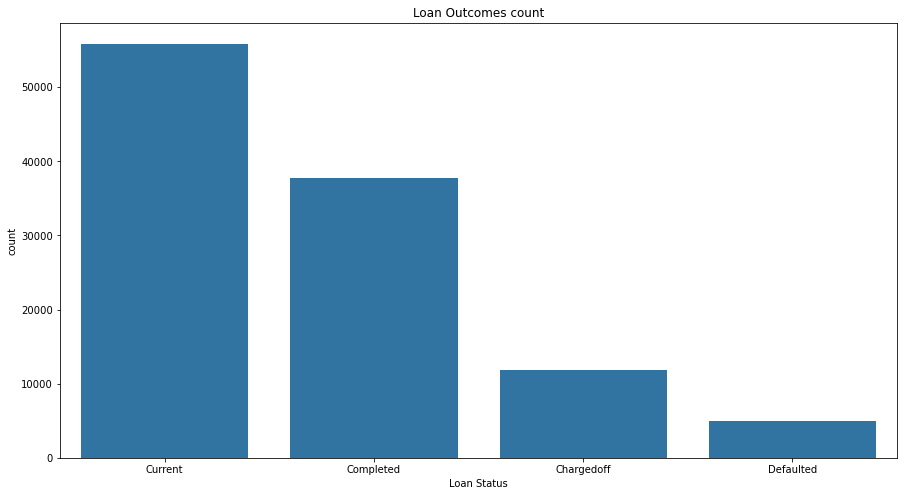

In [3]:
base_color = sb.color_palette()[0]
plt.figure(figsize=[15, 8])
sb.countplot(data=loans, x='LoanStatus', color=base_color, order=loans.LoanStatus.value_counts().iloc[:].index);
plt.xlabel('Loan Status');
plt.title('Loan Outcomes count');

## Loan Term Distribution
Loan Term is a categorical variable that represent the time during which the Loan should be repaid. The Loan Term can be either 12, 36, or 60 months. The most common Loan term is 30 months and then 60 months.


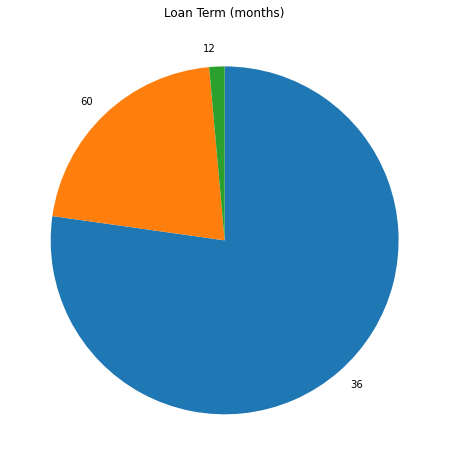

In [4]:
sorted_counts = loans['Term'].value_counts()
plt.figure(figsize=[15, 8])
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, );
ax = plt.gca()
ax.set_title('Loan Term (months)');

## Loan Status vs Borrower's Annual Percentage Rate

Plotting the Borrower's APR against the Loan Status, there is not a clear monotonic relationship between the Loan Status and the Borrower's APR. But, a Completed or a Current loan has slightly lower APR than a loan that is Defaulted or Chargedoff.

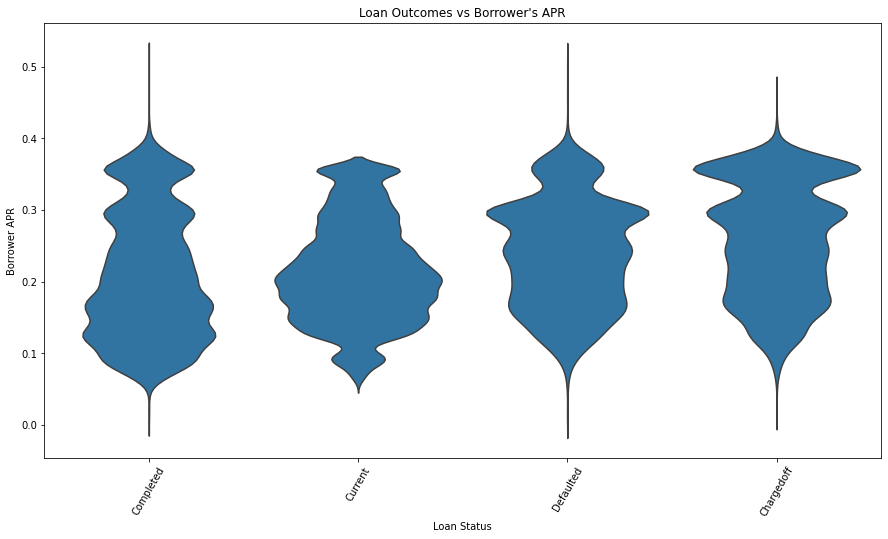

In [5]:
plt.figure(figsize=[15, 8])
sb.violinplot(data=loans, x='LoanStatus', y='BorrowerAPR', color=base_color, inner=None)
plt.xticks(rotation=60);
plt.xlabel('Loan Status');
plt.ylabel('Borrower APR');
plt.title("Loan Outcomes vs Borrower's APR");

## Loan Status vs Loan Term
Plotting the Loan Term against the Loan Status, we notice a positive correlation between the Loan term and the Loan Status. Most of the Completed loans had a term of 36 months. Another thing worht noting is the relationship between a loan term of 60 months and loans that are Current.

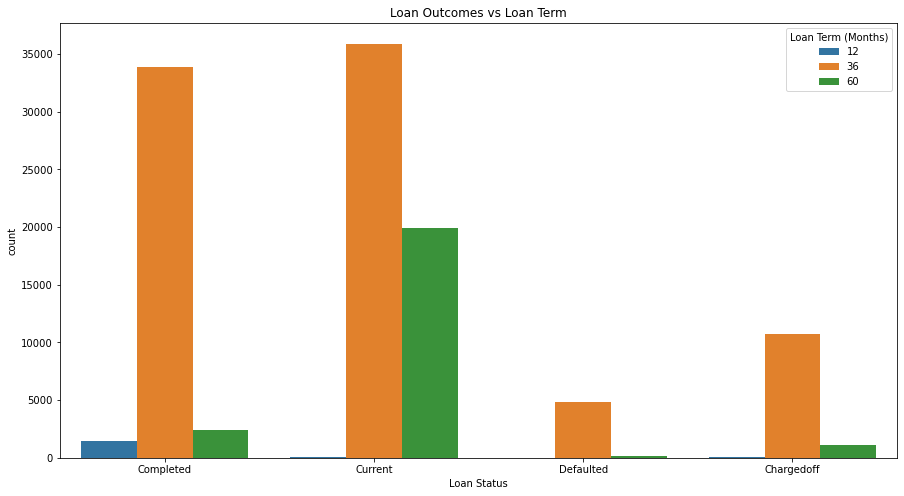

In [6]:
plt.figure(figsize=[15, 8])
sb.countplot(data = loans, x = 'LoanStatus', hue = 'Term');
plt.xlabel('Loan Status');
plt.legend(title="Loan Term (Months)");
plt.title('Loan Outcomes vs Loan Term');

## Loan Status vs Loan Term vs Borrower's APR

Plotting the Loan Term and the Borrower's APR against the Loan Status, We confirm that Borrower's APR does in fact impact the Loan Status. All Completed and Current Loans have a mean APR that is less than or equal to 0.238, and if the APR is 0.238, the Loan Term needs to be 60 months in order for the borrower to be able to Complete. 

The Borrower's APR doesn't change much, but the slight effect we noticed in its previous graph is confirmed by this result. Furthermore, it appears a longer Loan Term leads to Completed or Current Loan Status with higher APR values.

- For a 12 month Loan Term, any APR higher than 0.22 would lead to Default, Chargeoff, or payment delay.
- For a 36 month Loan Term, any APR higher than 0.237 would lead to Default, Chargeoff, or payment delay.
- For a 60 month Loan Term, any APR higher than 0.238 would lead to Default, Chargeoff, or payment delay.

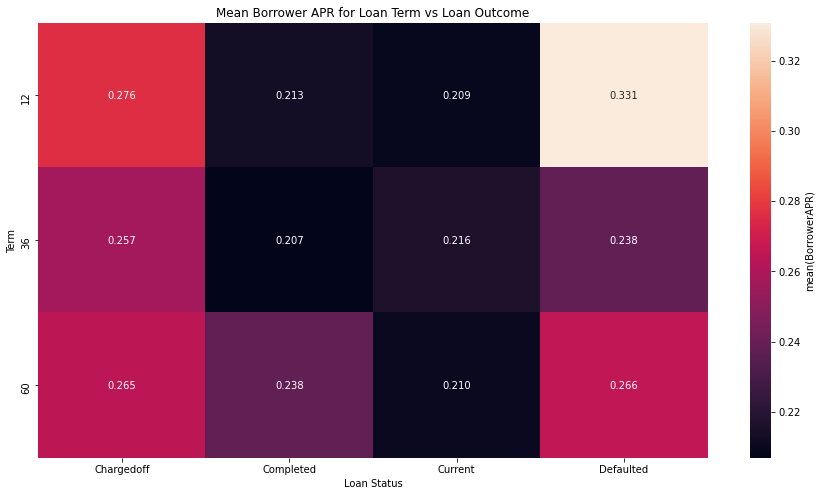

In [7]:
plt.figure(figsize=[15, 8])
cat_means = loans.groupby(['LoanStatus', 'Term']).mean()['BorrowerAPR']
cat_means = cat_means.reset_index(name = 'BorrowerAPR_avg');
cat_means = cat_means.pivot(index = 'Term', columns = 'LoanStatus', values = 'BorrowerAPR_avg');
sb.heatmap(cat_means, annot = True, fmt = '.3f', cbar_kws = {'label' : 'mean(BorrowerAPR)'});
plt.title('Mean Borrower APR for Loan Term vs Loan Outcome');
plt.xlabel('Loan Status');

In [8]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --no-input

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 726079 bytes to slide_deck_template.slides.html
